# Duramat Webinar: US NREL Electric Futures 2021

Simulate REference and High Electrification scenarios, comparing to a glass baseline with High bifacial future projection.

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

In [2]:
MATERIALS = ['glass','silver','silicon', 'copper','aluminium_frames']
MATERIAL = MATERIALS[0]

MODULEBASELINE = r'..\baselines\ElectrificationFutures_2021\baseline_modules_US_NREL_Electrification_Futures_2021_basecase.csv'
MODULEBASELINE_High = r'..\baselines\ElectrificationFutures_2021\baseline_modules_US_NREL_Electrification_Futures_2021_LowREHighElec.csv'


In [3]:
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
PV_ICE.__version__

'0+untagged.408.ged4504f.dirty'

In [5]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [6]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='base', file=MODULEBASELINE)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['base'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
    
r1.createScenario(name='high', file=MODULEBASELINE_High)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['high'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

r2 = PV_ICE.Simulation(name='bifacialTrend', path=testfolder)
r2.createScenario(name='base', file=MODULEBASELINE)
MATERIALBASELINE = r'..\baselines\PVSC_2021\baseline_material_glass_bifacialTrend.csv'
r2.scenario['base'].addMaterial('glass', file=MATERIALBASELINE)
for mat in range (1, len(MATERIALS)):
    MATERIALBASELINE = r'..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r2.scenario['base'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
    
r2.createScenario(name='high', file=MODULEBASELINE_High)
MATERIALBASELINE = r'..\baselines\PVSC_2021\baseline_material_glass_bifacialTrend.csv'
r2.scenario['high'].addMaterial('glass', file=MATERIALBASELINE)
for mat in range (1, len(MATERIALS)):
    MATERIALBASELINE = r'..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r2.scenario['high'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [7]:
IRENA= False
ELorRL = 'EL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49}  # Regular-loss scenario IRENA
    r1.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
    r2.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    r2.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :

## Creating Summary of results 


In [8]:
objects = [r1, r2]
scenarios = ['base', 'high']

In [9]:
USyearly=pd.DataFrame()


In [10]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


# Loop over objects
for kk in range(0, len(objects)):
    obj = objects[kk]

    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)

,Waste_glass_Simulation1_base,Waste_silicon_Simulation1_base,Waste_silver_Simulation1_base,Waste_copper_Simulation1_base,Waste_aluminium_frames_Simulation1_base,Waste_Module_Simulation1_base,Waste_glass_Simulation1_high,Waste_silicon_Simulation1_high,Waste_silver_Simulation1_high,Waste_copper_Simulation1_high,...,Waste_silver_bifacialTrend_base,Waste_copper_bifacialTrend_base,Waste_aluminium_frames_bifacialTrend_base,Waste_Module_bifacialTrend_base,Waste_glass_bifacialTrend_high,Waste_silicon_bifacialTrend_high,Waste_silver_bifacialTrend_high,Waste_copper_bifacialTrend_high,Waste_aluminium_frames_bifacialTrend_high,Waste_Module_bifacialTrend_high
0,3.557465e+07,7.064407e+07,1.903224e+05,2.848183e+03,3.797870e+06,1.102098e+08,3.557465e+07,7.064407e+07,1.903224e+05,2.848183e+03,...,1.903224e+05,2.848183e+03,3.797870e+06,1.102098e+08,3.557465e+07,7.064407e+07,1.903224e+05,2.848183e+03,3.797870e+06,1.102098e+08
1,2.708324e+07,5.272248e+07,1.392646e+05,2.169933e+03,2.823082e+06,8.277023e+07,2.708324e+07,5.272248e+07,1.392646e+05,2.169933e+03,...,1.392646e+05,2.169933e+03,2.823082e+06,8.277023e+07,2.708324e+07,5.272248e+07,1.392646e+05,2.169933e+03,2.823082e+06,8.277023e+07
2,3.215794e+07,6.125064e+07,1.590017e+05,2.609763e+03,3.015525e+06,9.658572e+07,3.215794e+07,6.125064e+07,1.590017e+05,2.609763e+03,...,1.590017e+05,2.609763e+03,3.015525e+06,9.658572e+07,3.215794e+07,6.125064e+07,1.590017e+05,2.609763e+03,3.015525e+06,9.658572e+07
3,3.246804e+07,6.001756e+07,1.558401e+05,2.828400e+03,2.960336e+06,9.560460e+07,3.246804e+07,6.001756e+07,1.558401e+05,2.828400e+03,...,1.558401e+05,2.828400e+03,2.960336e+06,9.560460e+07,3.246804e+07,6.001756e+07,1.558401e+05,2.828400e+03,2.960336e+06,9.560460e+07
4,4.681363e+07,8.317952e+07,2.210346e+05,4.625451e+03,4.447433e+06,1.346662e+08,4.681363e+07,8.317952e+07,2.210346e+05,4.625451e+03,...,2.210346e+05,4.625451e+03,4.447433e+06,1.346662e+08,4.681363e+07,8.317952e+07,2.210346e+05,4.625451e+03,4.447433e+06,1.346662e+08
5,5.956584e+07,9.979721e+07,1.985433e+05,7.251887e+03,6.229870e+06,1.657987e+08,5.956584e+07,9.979721e+07,1.985433e+05,7.251887e+03,...,1.985433e+05,7.251887e+03,6.229870e+06,1.657987e+08,5.956584e+07,9.979721e+07,1.985433e+05,7.251887e+03,6.229870e+06,1.657987e+08
6,8.272290e+07,1.292807e+08,2.979944e+05,1.239959e+04,9.677156e+06,2.219911e+08,8.272290e+07,1.292807e+08,2.979944e+05,1.239959e+04,...,2.979944e+05,1.239959e+04,9.677156e+06,2.219911e+08,8.272290e+07,1.292807e+08,2.979944e+05,1.239959e+04,9.677156e+06,2.219911e+08
7,1.294118e+08,1.907181e+08,4.886206e+05,2.206772e+04,1.628803e+07,3.369286e+08,1.294118e+08,1.907181e+08,4.886206e+05,2.206772e+04,...,4.886206e+05,2.206772e+04,1.628803e+07,3.369286e+08,1.294118e+08,1.907181e+08,4.886206e+05,2.206772e+04,1.628803e+07,3.369286e+08
8,1.887176e+08,2.607935e+08,7.523668e+05,3.646577e+04,2.571493e+07,4.760149e+08,1.887176e+08,2.607935e+08,7.523668e+05,3.646577e+04,...,7.523668e+05,3.646577e+04,2.571493e+07,4.760149e+08,1.887176e+08,2.607935e+08,7.523668e+05,3.646577e+04,2.571493e+07,4.760149e+08
9,3.002429e+08,4.109054e+08,1.188847e+06,5.977646e+04,4.122395e+07,7.536209e+08,3.002429e+08,4.109054e+08,1.188847e+06,5.977646e+04,...,1.188847e+06,5.977646e+04,4.122395e+07,7.536209e+08,3.002429e+08,4.109054e+08,1.188847e+06,5.977646e+04,4.122395e+07,7.536209e+08


In [11]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over objects
for kk in range(0, len(objects)):
    obj = objects[kk]

    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_EOL_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_EOL_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)

,Waste_glass_Simulation1_base,Waste_silicon_Simulation1_base,Waste_silver_Simulation1_base,Waste_copper_Simulation1_base,Waste_aluminium_frames_Simulation1_base,Waste_Module_Simulation1_base,Waste_glass_Simulation1_high,Waste_silicon_Simulation1_high,Waste_silver_Simulation1_high,Waste_copper_Simulation1_high,...,Waste_EOL_silver_bifacialTrend_base,Waste_EOL_copper_bifacialTrend_base,Waste_EOL_aluminium_frames_bifacialTrend_base,Waste_EOL_Module_bifacialTrend_base,Waste_EOL_glass_bifacialTrend_high,Waste_EOL_silicon_bifacialTrend_high,Waste_EOL_silver_bifacialTrend_high,Waste_EOL_copper_bifacialTrend_high,Waste_EOL_aluminium_frames_bifacialTrend_high,Waste_EOL_Module_bifacialTrend_high
0,3.557465e+07,7.064407e+07,1.903224e+05,2.848183e+03,3.797870e+06,1.102098e+08,3.557465e+07,7.064407e+07,1.903224e+05,2.848183e+03,...,0.000000e+00,0.000000,0.000000e+00,2.204195e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.204195e+08
1,2.708324e+07,5.272248e+07,1.392646e+05,2.169933e+03,2.823082e+06,8.277023e+07,2.708324e+07,5.272248e+07,1.392646e+05,2.169933e+03,...,2.946481e+01,1.800032,1.008931e+03,1.655444e+08,2.620761e+03,2.813476e+02,2.946481e+01,1.800032,1.008931e+03,1.655444e+08
2,3.215794e+07,6.125064e+07,1.590017e+05,2.609763e+03,3.015525e+06,9.658572e+07,3.215794e+07,6.125064e+07,1.590017e+05,2.609763e+03,...,6.500312e+02,39.764382,2.226990e+04,1.932585e+08,5.789505e+04,6.211031e+03,6.500312e+02,39.764382,2.226990e+04,1.932585e+08
3,3.246804e+07,6.001756e+07,1.558401e+05,2.828400e+03,2.960336e+06,9.560460e+07,3.246804e+07,6.001756e+07,1.558401e+05,2.828400e+03,...,4.223356e+03,259.147611,1.448630e+05,1.917763e+08,3.773066e+05,4.041556e+04,4.223356e+03,259.147611,1.448630e+05,1.917763e+08
4,4.681363e+07,8.317952e+07,2.210346e+05,4.625451e+03,4.447433e+06,1.346662e+08,4.681363e+07,8.317952e+07,2.210346e+05,4.625451e+03,...,1.614628e+04,993.228826,5.543535e+05,2.715048e+08,1.446094e+06,1.547052e+05,1.614628e+04,993.228826,5.543535e+05,2.715048e+08
5,5.956584e+07,9.979721e+07,1.985433e+05,7.251887e+03,6.229870e+06,1.657987e+08,5.956584e+07,9.979721e+07,1.985433e+05,7.251887e+03,...,4.560423e+04,2810.532847,1.566752e+06,3.377419e+08,4.092002e+06,4.373609e+05,4.560423e+04,2810.532847,1.566752e+06,3.377419e+08
6,8.272290e+07,1.292807e+08,2.979944e+05,1.239959e+04,9.677156e+06,2.219911e+08,8.272290e+07,1.292807e+08,2.979944e+05,1.239959e+04,...,1.059429e+05,6538.820528,3.641133e+06,4.582729e+08,9.520211e+06,1.016783e+06,1.059429e+05,6538.820528,3.641133e+06,4.582729e+08
7,1.294118e+08,1.907181e+08,4.886206e+05,2.206772e+04,1.628803e+07,3.369286e+08,1.294118e+08,1.907181e+08,4.886206e+05,2.206772e+04,...,2.144086e+05,13251.409481,7.370260e+06,7.028078e+08,1.929342e+07,2.059190e+06,2.144086e+05,13251.409481,7.370260e+06,7.028078e+08
8,1.887176e+08,2.607935e+08,7.523668e+05,3.646577e+04,2.571493e+07,4.760149e+08,1.887176e+08,2.607935e+08,7.523668e+05,3.646577e+04,...,3.905563e+05,24174.583554,1.342543e+07,1.004821e+09,3.519704e+07,3.753867e+06,3.905563e+05,24174.583554,1.342543e+07,1.004821e+09
9,3.002429e+08,4.109054e+08,1.188847e+06,5.977646e+04,4.122395e+07,7.536209e+08,3.002429e+08,4.109054e+08,1.188847e+06,5.977646e+04,...,6.522546e+05,40453.948432,2.241981e+07,1.595529e+09,5.889902e+07,6.276165e+06,6.522546e+05,40453.948432,2.241981e+07,1.595529e+09


In [12]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over objects
for kk in range(0, len(objects)):
    obj = objects[kk]

    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["VirginStock_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('VirginStock_') and col.endswith(obj.name+'_'+case)) ]
        USyearly['VirginStock_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)



### Converting to grams to METRIC Tons. 


In [13]:
USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons


In [14]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

,Waste_glass_Simulation1_base,Waste_silicon_Simulation1_base,Waste_silver_Simulation1_base,Waste_copper_Simulation1_base,Waste_aluminium_frames_Simulation1_base,Waste_Module_Simulation1_base,Waste_glass_Simulation1_high,Waste_silicon_Simulation1_high,Waste_silver_Simulation1_high,Waste_copper_Simulation1_high,...,VirginStock_silver_bifacialTrend_base,VirginStock_copper_bifacialTrend_base,VirginStock_aluminium_frames_bifacialTrend_base,VirginStock_Module_bifacialTrend_base,VirginStock_glass_bifacialTrend_high,VirginStock_silicon_bifacialTrend_high,VirginStock_silver_bifacialTrend_high,VirginStock_copper_bifacialTrend_high,VirginStock_aluminium_frames_bifacialTrend_high,VirginStock_Module_bifacialTrend_high
0,35.574651,70.644070,0.190322,0.002848,3.797870,110.209761,35.574651,70.644070,0.190322,0.002848,...,10.735207,0.590784,312.916411,1356.206388,858.816756,173.147230,10.735207,0.590784,312.916411,1356.206388
1,62.657891,123.366547,0.329587,0.005018,6.620951,192.979994,62.657891,123.366547,0.329587,0.005018,...,18.588818,1.040508,545.434342,2380.008888,1512.576923,302.368298,18.588818,1.040508,545.434342,2380.008888
2,94.815832,184.617192,0.488589,0.007628,9.636476,289.565717,94.815832,184.617192,0.488589,0.007628,...,27.520702,1.573415,792.055903,3561.139562,2287.512338,452.477204,27.520702,1.573415,792.055903,3561.139562
3,127.283871,244.634747,0.644429,0.010456,12.596813,385.170316,127.283871,244.634747,0.644429,0.010456,...,36.072700,2.106354,1024.026364,4723.908236,3062.222820,599.479998,36.072700,2.106354,1024.026364,4723.908236
4,174.097497,327.814264,0.865463,0.015082,17.044245,519.836552,174.097497,327.814264,0.865463,0.015082,...,47.629499,2.859925,1344.773035,6355.686284,4157.451641,802.972184,47.629499,2.859925,1344.773035,6355.686284


### Adding Installed Capacity to US

In [15]:
keyword='Installed_Capacity_[W]'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over SF Scenarios
for kk in range(0, len(objects)):
    obj = objects[kk]
    
    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        foo = obj.scenario[case].data[keyword]
        foo = foo.to_frame(name=keyword)
        UScum["Capacity_"+obj.name+'_'+case] = foo[keyword]


        
        

In [16]:
UScum.tail(20)


,Waste_glass_Simulation1_base,Waste_silicon_Simulation1_base,Waste_silver_Simulation1_base,Waste_copper_Simulation1_base,Waste_aluminium_frames_Simulation1_base,Waste_Module_Simulation1_base,Waste_glass_Simulation1_high,Waste_silicon_Simulation1_high,Waste_silver_Simulation1_high,Waste_copper_Simulation1_high,...,VirginStock_glass_bifacialTrend_high,VirginStock_silicon_bifacialTrend_high,VirginStock_silver_bifacialTrend_high,VirginStock_copper_bifacialTrend_high,VirginStock_aluminium_frames_bifacialTrend_high,VirginStock_Module_bifacialTrend_high,Capacity_Simulation1_base,Capacity_Simulation1_high,Capacity_bifacialTrend_base,Capacity_bifacialTrend_high
36,7.056043e+05,314301.060424,642.670688,240.903227,86191.774810,1.106981e+06,1.078755e+06,5.261496e+05,710.661856,306.294586,...,3.784116e+07,1.879427e+06,12173.544789,29726.801356,4.513629e+06,4.427611e+07,3.941273e+11,7.833385e+11,3.941273e+11,7.833385e+11
37,8.207424e+05,340182.059523,730.016950,303.121730,105940.097677,1.267898e+06,1.251880e+06,5.910551e+05,799.378007,374.349345,...,4.422125e+07,2.137018e+06,13490.170378,34032.188285,5.178966e+06,5.158475e+07,4.391642e+11,9.142533e+11,4.391642e+11,9.142533e+11
38,9.228722e+05,358737.495813,797.395860,363.915263,123576.908589,1.406348e+06,1.416068e+06,6.417343e+05,891.598835,450.557001,...,4.903227e+07,2.331259e+06,14482.996477,37278.745657,5.680502e+06,5.709579e+07,4.680245e+11,1.011295e+12,4.680245e+11,1.011295e+12
39,1.068318e+06,379482.238605,906.006306,456.411296,150425.555463,1.599588e+06,1.599940e+06,6.932022e+05,992.389263,542.458805,...,5.381943e+07,2.524538e+06,15470.901000,40509.209394,6.179461e+06,6.257941e+07,4.958984e+11,1.107415e+12,4.958984e+11,1.107415e+12
40,1.234903e+06,396252.080126,1022.510904,570.654165,182101.797280,1.814850e+06,1.771494e+06,7.254170e+05,1094.108714,646.339604,...,5.648694e+07,2.632237e+06,16021.384481,42309.299262,6.457157e+06,6.563466e+07,5.107564e+11,1.157235e+12,5.107564e+11,1.157235e+12
41,1.378401e+06,411711.266292,1098.674107,673.243942,205910.980659,1.997795e+06,1.970392e+06,7.588882e+05,1205.312525,773.177375,...,5.914272e+07,2.739463e+06,16569.450499,44101.483986,6.733521e+06,6.867637e+07,5.258773e+11,1.206190e+12,5.258773e+11,1.206190e+12
42,1.653774e+06,433623.341467,1263.014301,870.515851,254843.394763,2.344374e+06,2.218322e+06,8.032971e+05,1331.769767,931.211690,...,6.276618e+07,2.885759e+06,17317.212942,46546.679246,7.110725e+06,7.282652e+07,5.376112e+11,1.275546e+12,5.376112e+11,1.275546e+12
43,1.853240e+06,451468.759829,1364.148923,1023.674831,287513.675680,2.594610e+06,2.503983e+06,8.494163e+05,1472.776509,1122.454318,...,6.637535e+07,3.031478e+06,18062.027860,48982.236049,7.486290e+06,7.696016e+07,5.506204e+11,1.343769e+12,5.506204e+11,1.343769e+12
44,2.119598e+06,485199.840883,1491.843262,1218.603579,329020.524716,2.936529e+06,2.791719e+06,8.751029e+05,1621.871378,1343.230754,...,6.766002e+07,3.083348e+06,18327.152380,49849.197509,7.619158e+06,7.843070e+07,5.941573e+11,1.360009e+12,5.941573e+11,1.360009e+12
45,2.467883e+06,522926.919927,1666.275260,1477.378136,384922.232799,3.378876e+06,3.119713e+06,9.026029e+05,1786.758438,1602.076737,...,6.894008e+07,3.135033e+06,18591.328911,50713.059032,7.751394e+06,7.989581e+07,6.358827e+11,1.375256e+12,6.358827e+11,1.375256e+12


## Mining Capacity

In [17]:
USyearly.index = r1.scenario['base'].data['year']
UScum.index = r1.scenario['base'].data['year']

In [18]:
mining2020_aluminum = 65267000
mining2020_silver = 22260
mining2020_copper = 20000000
mining2020_silicon = 8000000

In [19]:
objects = [r1, r2]
scenarios = ['base', 'high']

In [20]:
# PLOTTING GALORE

In [21]:
USyearly.keys()

Index(['Waste_glass_Simulation1_base', 'Waste_silicon_Simulation1_base',
       'Waste_silver_Simulation1_base', 'Waste_copper_Simulation1_base',
       'Waste_aluminium_frames_Simulation1_base',
       'Waste_Module_Simulation1_base', 'Waste_glass_Simulation1_high',
       'Waste_silicon_Simulation1_high', 'Waste_silver_Simulation1_high',
       'Waste_copper_Simulation1_high',
       'Waste_aluminium_frames_Simulation1_high',
       'Waste_Module_Simulation1_high', 'Waste_glass_bifacialTrend_base',
       'Waste_silicon_bifacialTrend_base', 'Waste_silver_bifacialTrend_base',
       'Waste_copper_bifacialTrend_base',
       'Waste_aluminium_frames_bifacialTrend_base',
       'Waste_Module_bifacialTrend_base', 'Waste_glass_bifacialTrend_high',
       'Waste_silicon_bifacialTrend_high', 'Waste_silver_bifacialTrend_high',
       'Waste_copper_bifacialTrend_high',
       'Waste_aluminium_frames_bifacialTrend_high',
       'Waste_Module_bifacialTrend_high', 'Waste_EOL_glass_Simulation1_bas

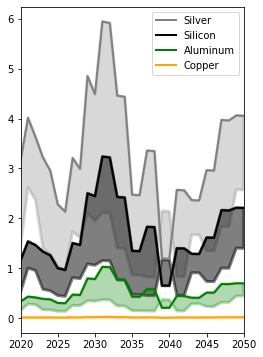

In [22]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)


# Loop over CASES
name2 = 'Simulation1_high'
name0 = 'Simulation1_base'
# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_'+name2]*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')

axs.fill_between(USyearly.index, USyearly[keyw+materials[2]+'_'+name0]*100/mining2020_silver, USyearly[keyw+materials[2]+'_'+name2]*100/mining2020_silver,
                   color='gray', lw=3, alpha=.3)
    

axs.plot(USyearly[keyw+materials[1]+'_'+name2]*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.fill_between(USyearly.index, USyearly[keyw+materials[1]+'_'+name0]*100/mining2020_silicon, 
                                USyearly[keyw+materials[1]+'_'+name2]*100/mining2020_silicon,
                   color='k', lw=3, alpha=.5)



axs.plot(USyearly[keyw+materials[4]+'_'+name2]*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')

axs.fill_between(USyearly.index, USyearly[keyw+materials[4]+'_'+name0]*100/mining2020_aluminum, 
                                USyearly[keyw+materials[4]+'_'+name2]*100/mining2020_aluminum,
                   color='g', lw=3, alpha=.3)



axs.plot(USyearly[keyw+materials[3]+'_'+name2]*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.fill_between(USyearly.index, USyearly[keyw+materials[3]+'_'+name0]*100/mining2020_copper, 
                                USyearly[keyw+materials[3]+'_'+name2]*100/mining2020_copper,
                   color='orange', lw=3, alpha=.3)



axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')

#axs.set_ylabel('Virgin material needs as a percentage of 2020 global mining production capacity [%]')

fig.savefig(title_Method+' Fig_1x1_MaterialNeeds Ratio to Production_NREL2018.png', dpi=600)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


Cumulative Virgin Needs by 2050 Million Tones by Scenario


0     55.813184
1    113.089407
dtype: float64

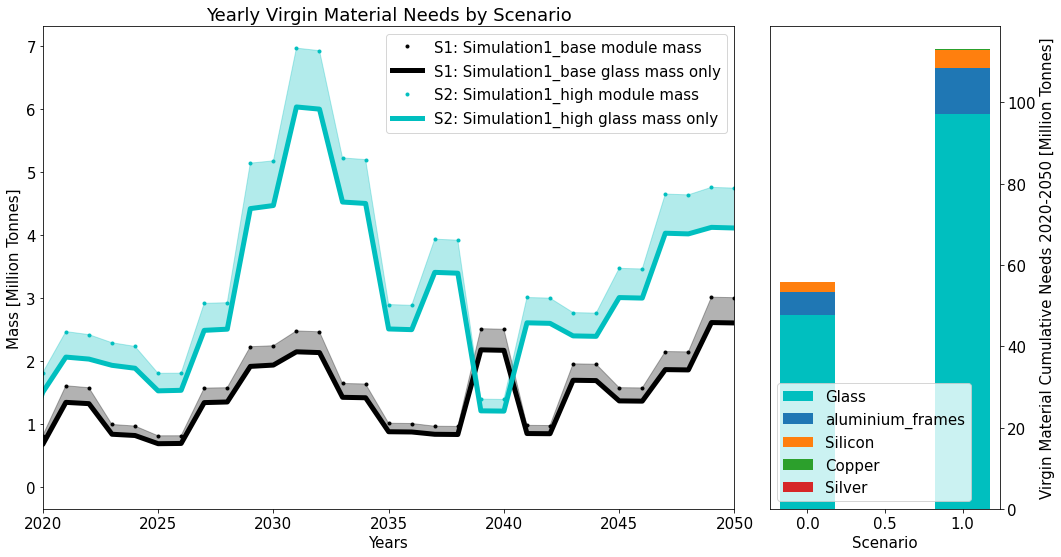

In [23]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# loop plotting over scenarios
name2 = 'Simulation1_high'
name0 = 'Simulation1_base'


# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Virgin Material Needs by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly Virgin Material Needs by Scenario and Cumulatives_NREL2018.png', dpi=600)


print("Cumulative Virgin Needs by 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


### Bonus: Bifacial Trend Cumulative Virgin Needs (not plotted, just values)

In [24]:
name2 = 'bifacialTrend_high'
name0 = 'bifacialTrend_base'

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes
 
print("Cumulative Virgin Needs by 2050 Million Tones by Scenario for Bifacial Trend")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


Cumulative Virgin Needs by 2050 Million Tones by Scenario for Bifacial Trend


0     58.678619
1    119.198844
dtype: float64

### Waste by year

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


Cumulative Waste by 2050 Million Tones by case


0     8.162090
1    12.150297
dtype: float64

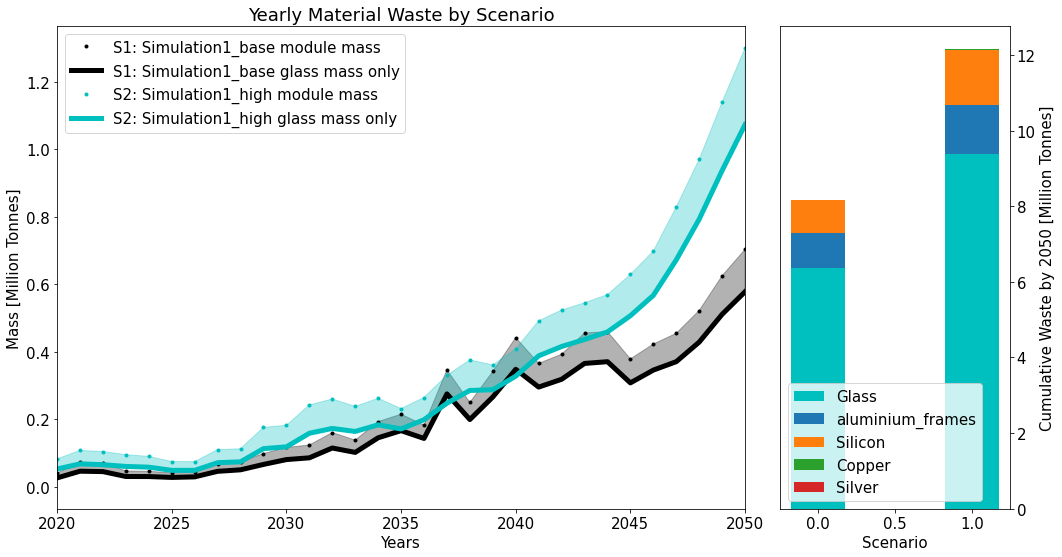

In [25]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# loop plotting over scenarios
name2 = 'Simulation1_high'
name0 = 'Simulation1_base'


# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Material Waste by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative Waste by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly WASTE by Scenario and Cumulatives_NREL2018.png', dpi=600)

print("Cumulative Waste by 2050 Million Tones by case")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


Cumulative Eol Only Waste by 2050 Million Tones by case


0    6.495971
1    8.922681
dtype: float64

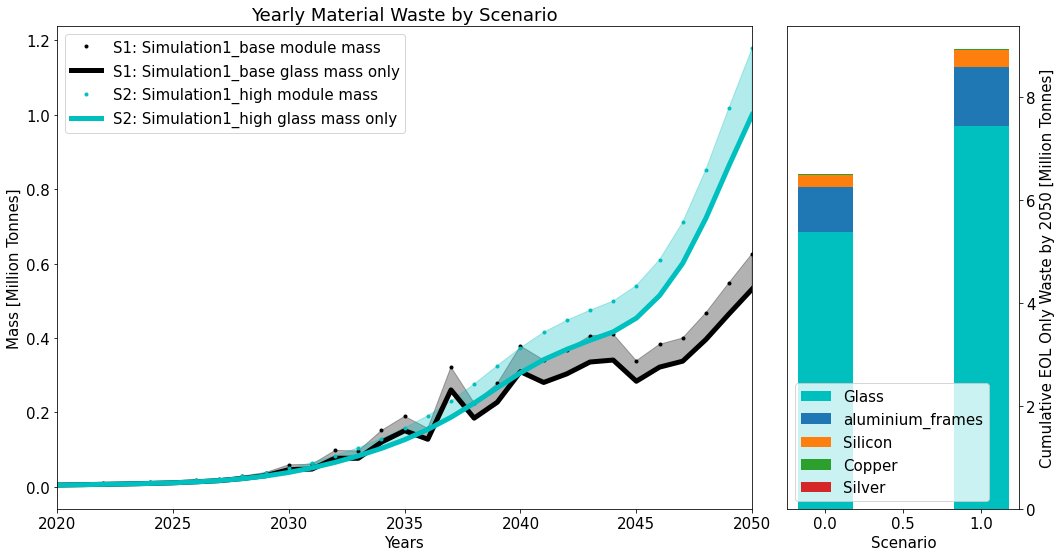

In [26]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='Waste_EOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# loop plotting over scenarios
name2 = 'Simulation1_high'
name0 = 'Simulation1_base'


# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Material Waste by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative EOL Only Waste by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly EOL Only WASTE by Scenario and Cumulatives_NREL2018.png', dpi=600)

print("Cumulative Eol Only Waste by 2050 Million Tones by case")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)
